# Проект: Статистический анализ данных

## Вступление

**Заголовок:** Анализ сервиса аренды самокатов GoFast

**Описание проекта:** В настоящее время аренда самокатов набирает популярность. Стоимость и длительность поездок может зависеть от множества факторов. С помощью данных сервиса аренды самокатов GoFast, которые включают в себя информацию о некоторых пользователях из нескольких городов, а также о их поездках, мы стремимся проверять ряд гипотез, которые могут помочь бизнесу вырасти. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

- без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 8 рублей;
- стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
- абонентская плата — 199 рублей в месяц;
- стоимость одной минуты поездки — 6 рублей;
- стоимость старта — бесплатно.

**Цель исследования:** Определить достоверность гипотез для дальнейшего увеличения количества пользователей с подпиской.

**Ход исследования:** 
- Подготовка данных: загрузка, описание, анализ общей информации из датасетов
- Предообработка данных: пропуски, дубликаты, типы данных
- Исследовательский анализ данных
- Расширение и объединение набора данных
- Проверка гипотез

**Общий вывод:** резюмирование полученных результатов, формулировка ключевых выводов и рекоммендаций

С помощью данналого исследование мы стремимся дать всесторонний анализ клиентов сервиса GoFast, что даст понимание для продакт-менеджеров о поведении пользователей, что в свою очередь послужить стартом для разработки стратегии бизнеса.


## Описание данных

**Пользователи — users_go.csv**
- `user_id` — уникальный идентификатор пользователя
- `name` — имя пользователя
- `age` — возраст
- `city` — город
- `subscription_type` — тип подписки (free, ultra)

**Поeздки — rides_go.csv**
- `user_id` — уникальный идентификатор пользователя
- `distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` — дата совершения поездки

**Подписки — subscriptions_go.csv**
- `subscription_type` — тип подписки
- `minute_price` — стоимость одной минуты поездки по данной подписке
- `start_ride_price` — стоимость начала поездки
- `subscription_fee` — стоимость ежемесячного платежа

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import pylab
import os

import warnings
warnings.filterwarnings("ignore")

## Загрузка данных и общая информация

In [2]:
def import_data(way, sep=',', decimal='.'):
    data_path = os.path.join('..', 'data', way)
    data = pd.read_csv(data_path, sep=sep, decimal=decimal)
    return data

In [3]:
data_users = import_data('users_go.csv')
data_rides = import_data('rides_go.csv')
data_subscriptions = import_data('subscriptions_go.csv')

In [4]:
def primary_analusis(data):
    display(data.info())
    display(data.head())
    display(data.describe())

### Таблица с пользователям - `data_users`

In [5]:
primary_analusis(data_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


Данные загружены корректно.

### Таблица с поездками - `data_rides`

In [6]:
primary_analusis(data_rides)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


Данные загружены корректно. Вопросы вызывает колонка `date` - нужно привести к типу `datetime` 

### Таблица с подписками - `data_subscriptions`

In [7]:
primary_analusis(data_subscriptions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


Данные загружены корректно.

## Предобработка данных

### Пропуски

In [8]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [9]:
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

In [10]:
data_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропуски отсутсвуют.

### Дубликаты

#### Таблица с пользователями

In [11]:
data_users.duplicated().sum()

31

In [12]:
data_users.drop_duplicates(inplace=True)

In [13]:
data_users.duplicated().sum()

0

In [14]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [15]:
data_users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

#### Таблица с тарифами

In [16]:
data_subscriptions.duplicated().sum()

0

#### Таблица с поездками

In [17]:
data_rides.duplicated().sum()

0

Явные дубликаты удалены.

### Типы данных

Поменяем тип данных и добавим столбец с номером месяца в таблице с поездками

In [18]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format = '%Y-%m-%d')

In [19]:
data_rides['date'].head(10)

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
5   2021-10-09
6   2021-10-19
7   2021-11-06
8   2021-11-14
9   2021-11-22
Name: date, dtype: datetime64[ns]

Сначала проверим, за какой период предоставлены данные. Если данные предоставлены за несколько лет, то они могут попасть в один и тот же месяц

In [20]:
data_rides['date'].dt.year.unique()

array([2021], dtype=int32)

Данные предоставлены только за один год, соответственно ошибок не будет, добавим номер месяца:

In [21]:
data_rides['month'] = data_rides['date'].dt.month

In [22]:
data_rides['month'].head(10)

0     1
1     1
2     4
3     8
4     8
5    10
6    10
7    11
8    11
9    11
Name: month, dtype: int32

Тип данных поменяли корректно, столбец с месяцем добавлен корректно.

### Вывод

Предобработка проведена, пропусков не обнаружено, дубликаты удалены, типы данных приведены к нужным.

## Исследовательский анализ данных

### Частота встречаемости городов

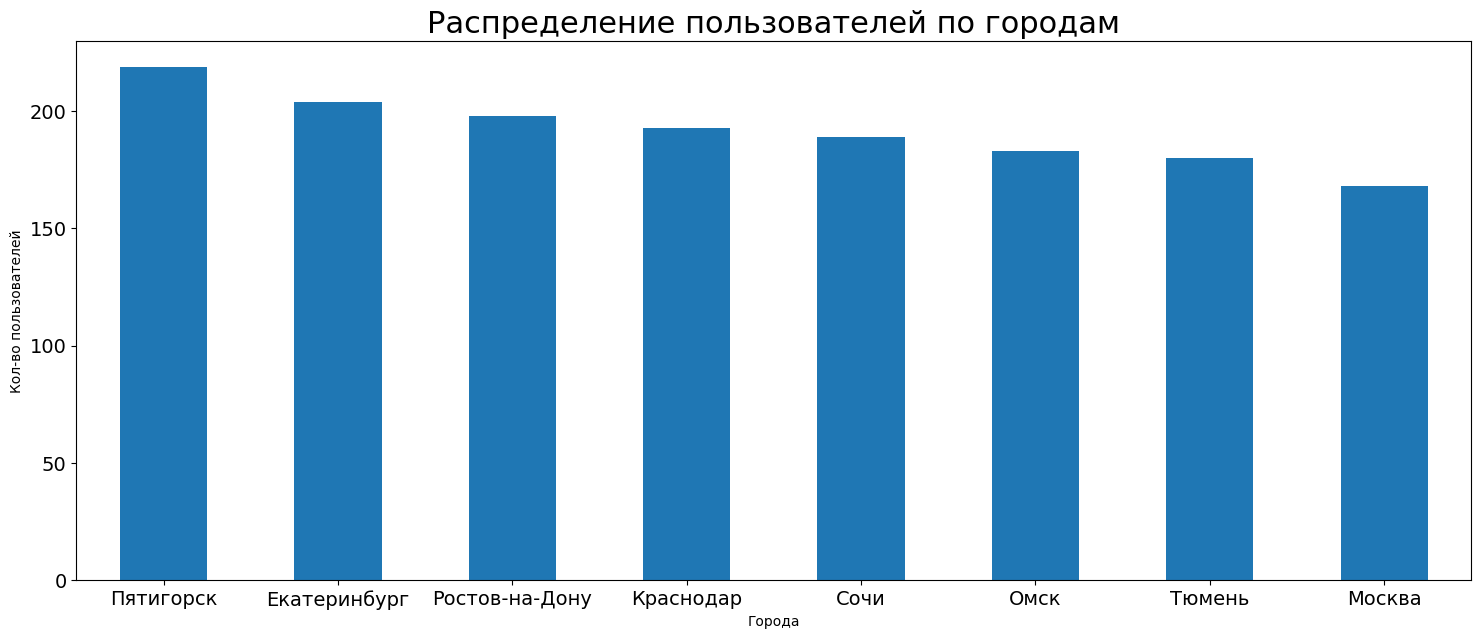

In [23]:
(
    data_users['city'].value_counts()
    .plot(kind='bar',
          figsize=(18,7),
          rot=0,
          fontsize = 14,
         )
)
plt.title('Распределение пользователей по городам', size = 22)
plt.xlabel('Города', size=10)
plt.ylabel('Кол-во пользователей', size=10)

# plt.bar_label()
plt.show()

In [24]:
data_users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

#### Вывод

Количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168. Связано это скорее всего с тем, что Пятигорск по размерам в несколько раз меньше Москвы, т.е. в Пятигорске удобнее брать самокат, чтобы куда-то добраться.

### Соотношение пользователей с подпиской и без подписки

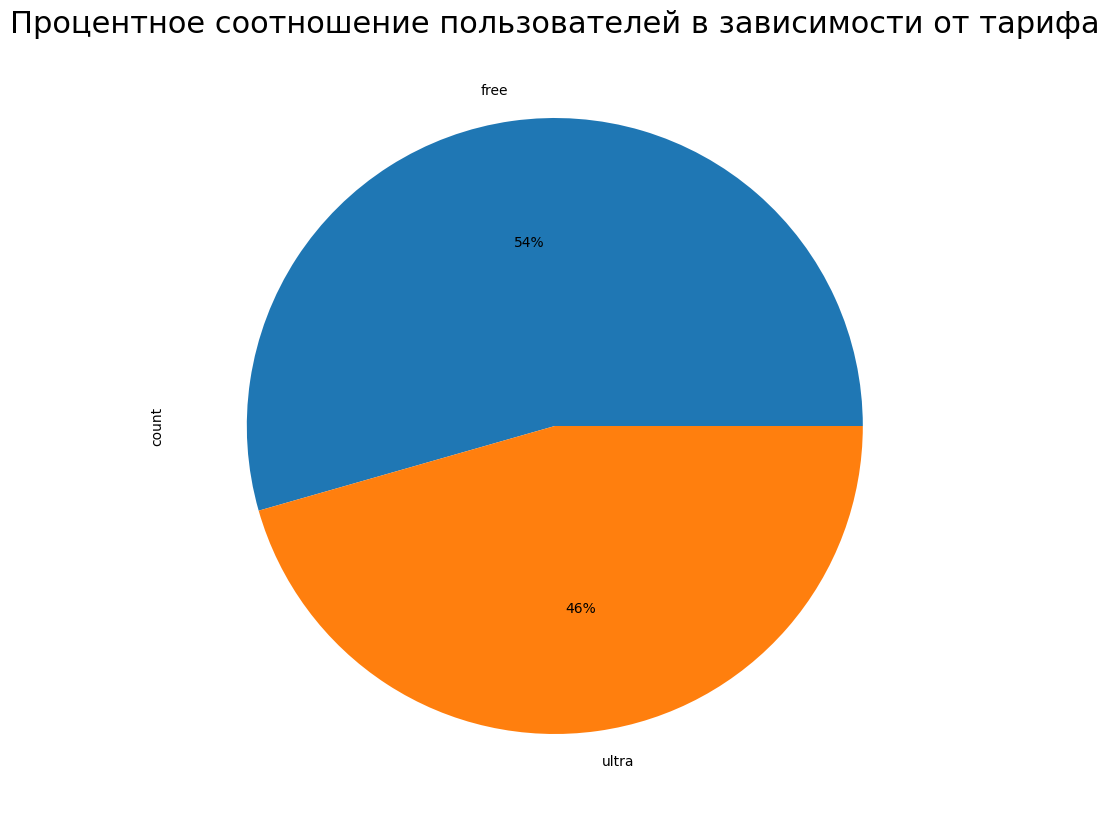

In [25]:
(
    data_users['subscription_type'].value_counts()
    .plot(
        kind = 'pie', 
        autopct = '%1.0f%%', 
        figsize=(10,10),
    )
)
plt.title('Процентное соотношение пользователей в зависимости от тарифа', size = 22)
plt.show()

In [26]:
data_users['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

#### Вывод

Пользователей, использующих бесплатную подписку 835 человек, что является ~54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является ~46%.

### Возраст пользователей

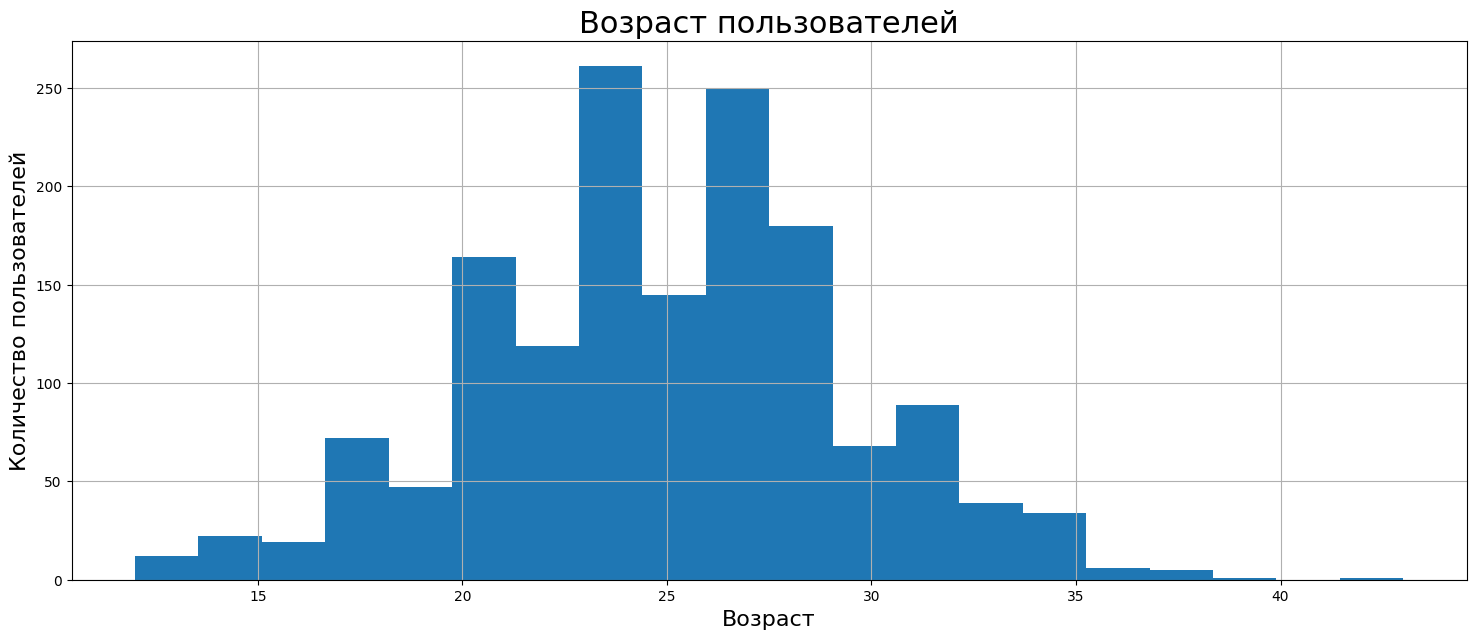

In [27]:
(
    data_users['age'].sort_values()
    .hist(
        bins = 20,
        grid = True,
        figsize = (18, 7)
    )
)
plt.title('Возраст пользователей', size = 22)
plt.xlabel('Возраст', size = 16)
plt.ylabel('Количество пользователей', size = 16)
plt.show()

#### Вывод

- Самыми младшими являются пользователи 12 лет.
- Самыми старшими - 43 лет.

В целом, большая часть пользователей приложения укладываются в промежуток от 20 до 30 лет.

### Растояние, которое пользователь преодолел за одну поездку

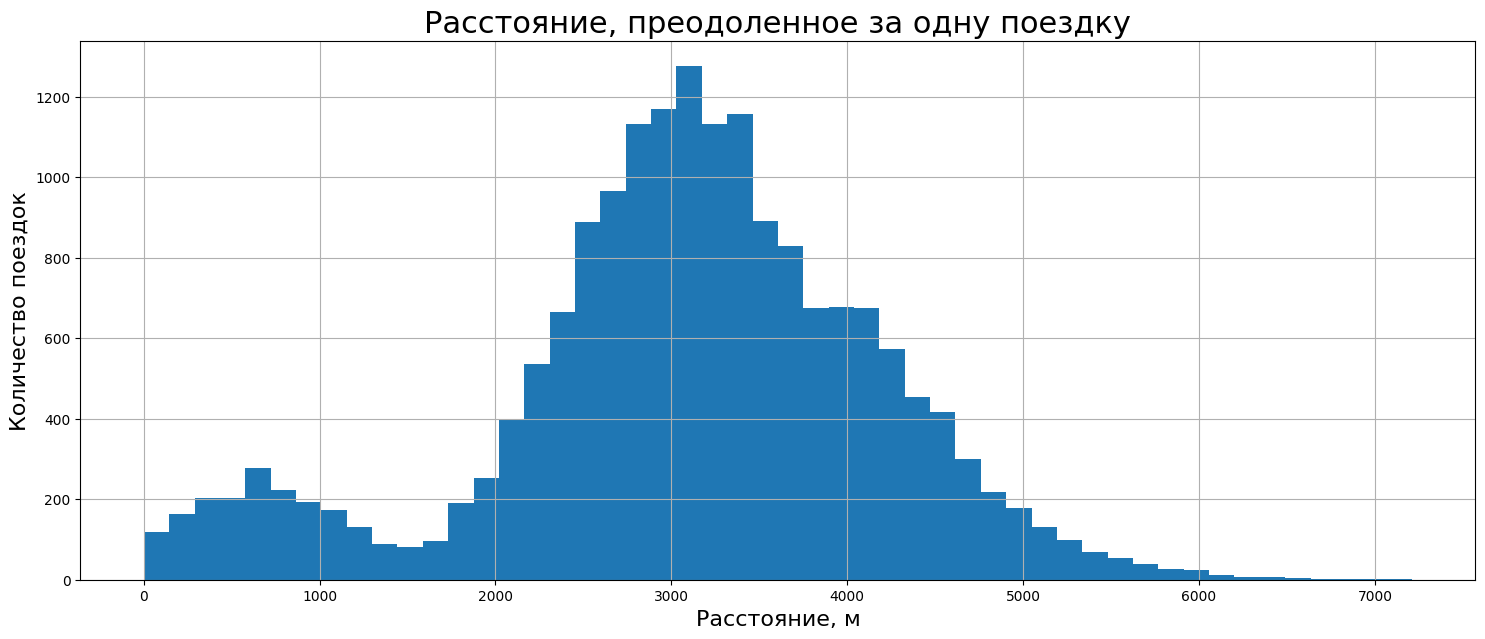

In [28]:
(
    data_rides['distance'].sort_values()
    .hist(
        bins = 50,
        grid = True,
        figsize = (18, 7)
    )
)
plt.title('Расстояние, преодоленное за одну поездку', size = 22)
plt.xlabel('Расстояние, м', size = 16)
plt.ylabel('Количество поездок', size = 16)
plt.show()

#### Вывод

- Самая короткая дистанция - 0.86 км
- Самая длинная - 7.2 км

В основном пользователи проезжают от 2.5 км до 4 км.

### Продолжительность поездок

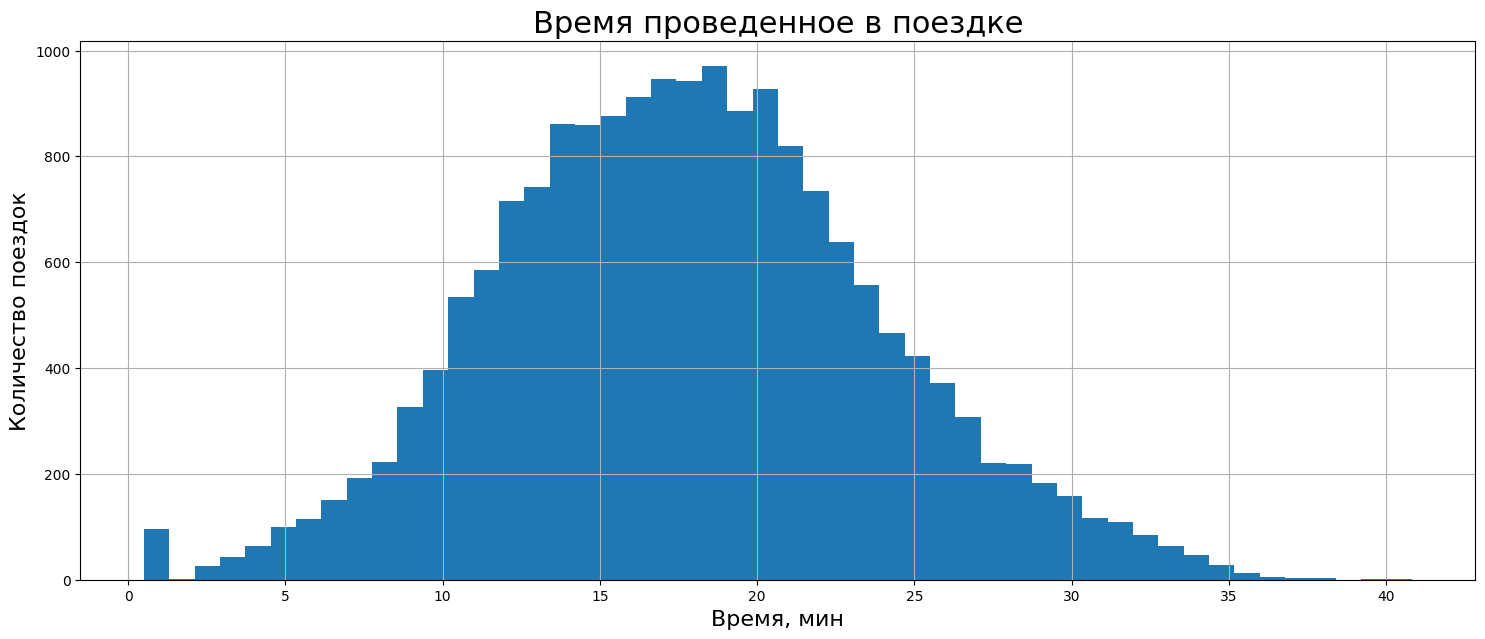

In [29]:
data_rides['duration'].hist(
    bins = 50,
    grid = True,
    figsize = (18, 7)
)
plt.title('Время проведенное в поездке', size = 22)
plt.xlabel('Время, мин', size = 16)
plt.ylabel('Количество поездок', size = 16)
plt.show()

#### Вывод

- Самые короткие поездки - по пол минуты. Выглядят крайне странно, возможно пользователи просто передумали пользоваться самокатом. Либо же техническая неинсправность самого самоката.
- Самая длинная поездка заняла 40 минут.

В основном же длительность поездки состовляет 13 - 22 минуты.

## Объединение данных и анализ полученных таблиц

Обьеденим датафреймы последовательно с помощью merge

In [30]:
data_rides.shape[0]

18068

In [31]:
full_data = data_users.merge(data_rides)

In [32]:
full_data.shape[0]

18068

In [33]:
full_data = full_data.merge(data_subscriptions)

In [34]:
full_data.shape[0]

18068

In [35]:
full_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков нет, размерность не изменилась, обьединение прошло успешно

In [36]:
full_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


Создадим датафреймы:
- `free_sub` с данными о пользователях без подписки
- `ultra_sub` с данными о пользователях с подпиской

In [37]:
free_sub = full_data[full_data['subscription_type'] == 'free']
ultra_sub = full_data[full_data['subscription_type'] == 'ultra']

Визуализируем информацию о расстоянии и времени с тарифом и без

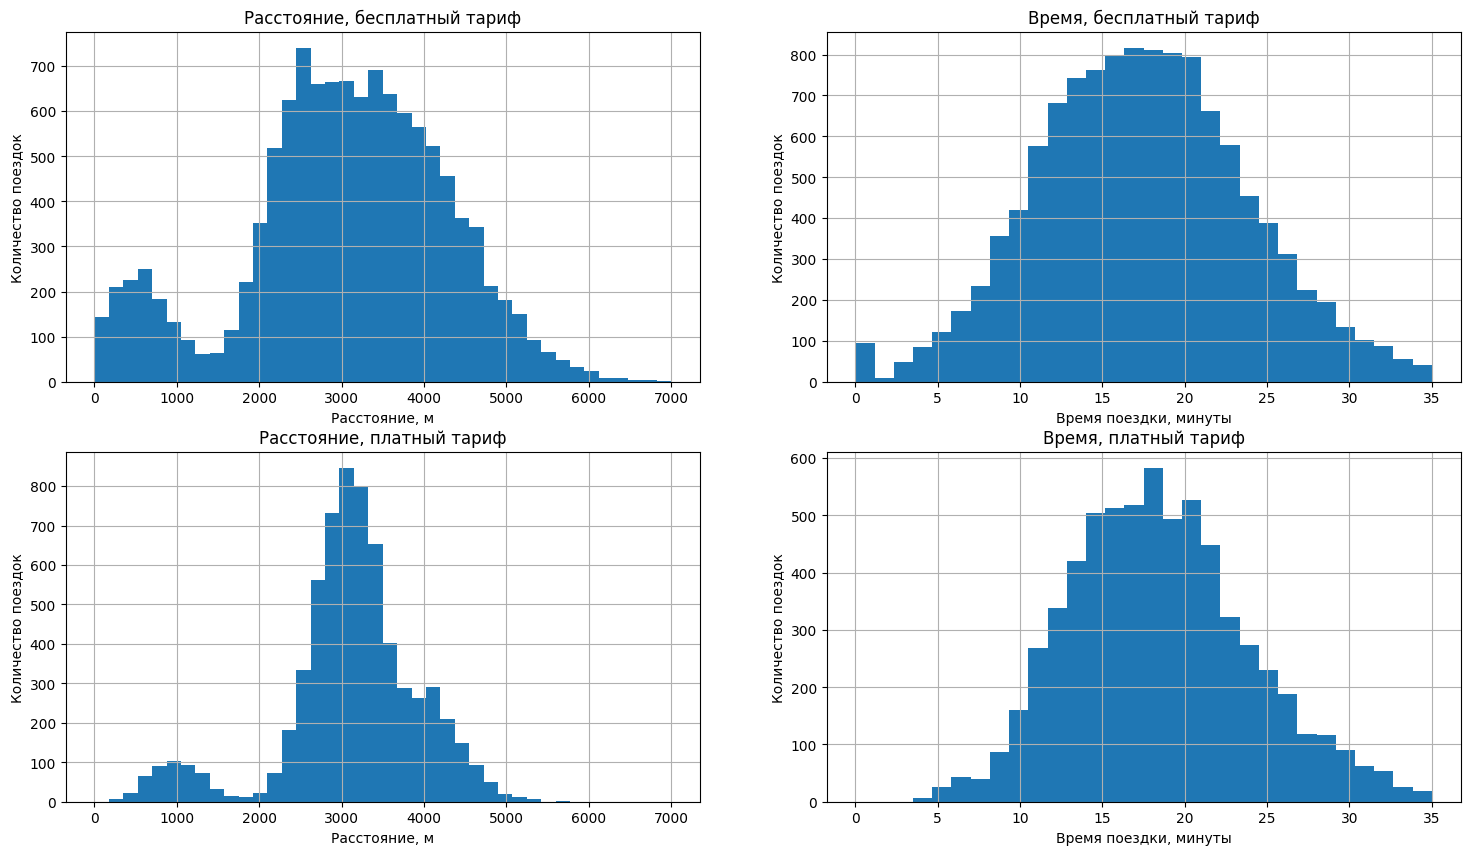

In [38]:
plt.figure(figsize=(18,10))

pylab.subplot (2, 2, 1)
free_sub['distance'].hist(bins=40, range = (0, 7000))
plt.title('Расстояние, бесплатный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')

pylab.subplot (2, 2, 2)
free_sub['duration'].hist(bins=30, range = (0, 35))
plt.title('Время, бесплатный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')

pylab.subplot (2, 2, 3)
ultra_sub['distance'].hist(bins=40, range = (0, 7000))
plt.title('Расстояние, платный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')

pylab.subplot (2, 2, 4)
ultra_sub['duration'].hist(bins=30, range = (0, 35))
plt.title('Время, платный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')

plt.show()

### Вывод

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.

Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.

Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

## Подсчет выручки

Найдем суммарное расстояние, количество поeздок и суммарное время для каждого пользователя за каждый месяц

In [39]:
full_data['duration']=np.ceil(full_data['duration'])
full_data['distance']=round(full_data['distance'])

In [40]:
total_data = (
    full_data.pivot_table(index=['month', 'user_id'],
                          values = ['distance', 'duration', 'name', 'subscription_type'],
                          aggfunc = {'distance': sum,
                                     'duration' : sum, 
                                     'name' : len, 
                                     'subscription_type' : min}
                                  )
    .rename(columns = {'name' : 'count_tips'})
    .sort_values(by='month')
    .reset_index(drop=False)
             )
total_data.head(10)

,month,user_id,distance,duration,count_tips,subscription_type
0,1,193,5318.0,34.0,2,ultra
1,1,195,5175.0,45.0,2,ultra
2,1,197,14685.0,84.0,4,ultra
3,1,198,5603.0,32.0,2,ultra
4,1,202,7709.0,42.0,2,ultra
5,1,203,5616.0,34.0,2,ultra
6,1,7,6478.0,28.0,2,ultra
7,1,12,3577.0,33.0,1,ultra
8,1,171,3812.0,19.0,1,ultra
9,1,173,7404.0,45.0,2,ultra


Добавим столбец с помесячной выручкой.


Помесячная выручка считается по формуле:  
`стоимость старта поездки` ×  `количество поездок` + `стоимость одной минуты поездки` × `общая продолжительность всех поездок в минутах` + `стоимость подписки`

In [41]:
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['count_tips']
    else:
        return 'Not such sub'

In [42]:
total_data['revenue_per_month'] = total_data.apply(revenue, axis=1)

In [43]:
total_data[total_data['user_id']==1]

,month,user_id,distance,duration,count_tips,subscription_type,revenue_per_month
989,1,1,7028.0,42.0,2,ultra,451.0
3747,4,1,754.0,7.0,1,ultra,241.0
6730,8,1,6724.0,46.0,2,ultra,475.0
8591,10,1,5810.0,32.0,2,ultra,391.0
10345,11,1,7004.0,56.0,3,ultra,535.0
10454,12,1,6752.0,28.0,2,ultra,367.0


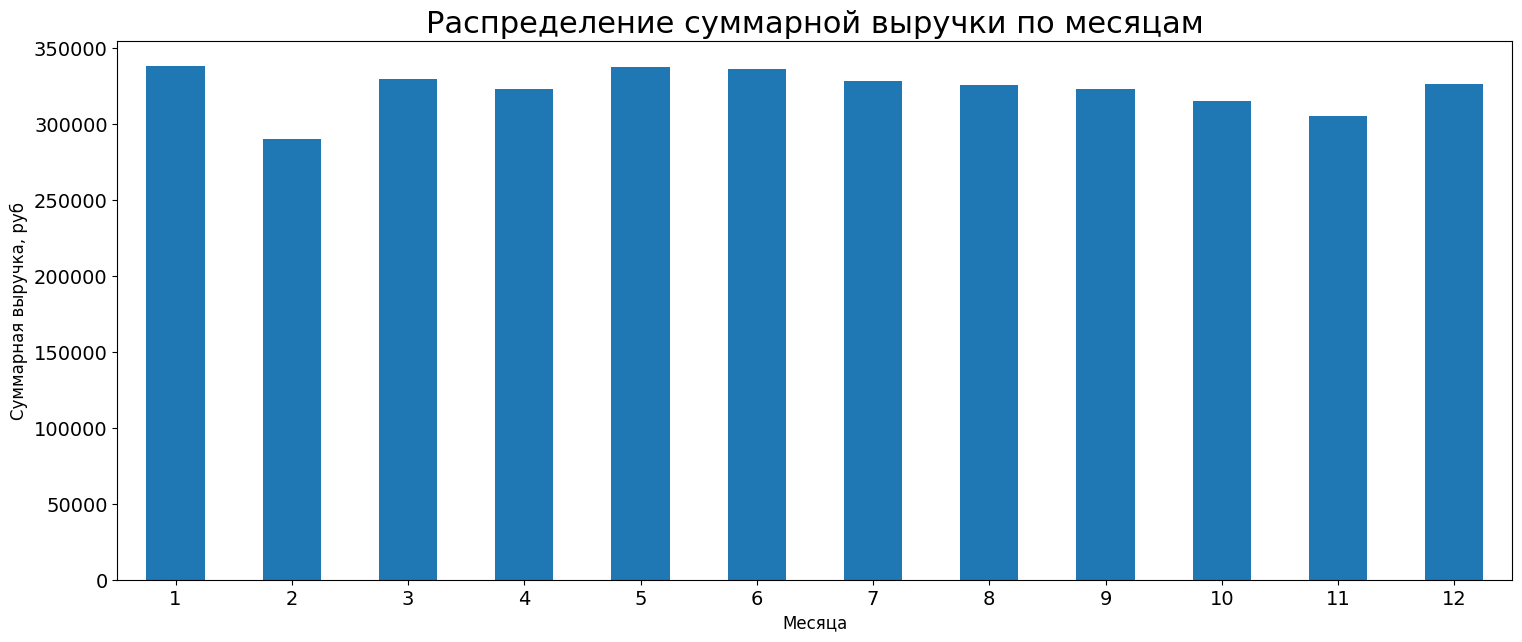

In [44]:
(
    total_data.groupby('month')['revenue_per_month'].sum()
    .plot(kind='bar',
          figsize=(18,7),
          rot=0,
          fontsize = 14,
         )
)
plt.title('Распределение суммарной выручки по месяцам', size = 22)
plt.xlabel('Месяца', size=12)
plt.ylabel('Суммарная выручка, руб', size=12)

plt.show()

### Вывод

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

Меньше всего выручки в феврале, вероятно это связано с сезонностью в некоторых регионах. В целом выручка примерно равномерна распределена в течение года.  

## Проверка гипотез

### Гипотеза №1 - Тратят ли пользователи с подпиской больше времени на поездки?

Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

**H_0: Время (duration) пользователей на подписке ultra = время (duration) пользователей на подписке free**

**H_1: Время (duration) пользователей на подписке ultra > время (duration) пользователей на подписке free**

**alpha = 0.01**

In [45]:
ultra = ultra_sub['duration'] 

free = free_sub['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = 0.1

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.280409831664567e-34
Отвергаем нулевую гипотезу


### Вывод

Нулевая гипотеза отвергнута. 
Время поездки пользователей на тарифе ultra отличается от времени поездок пользователей без тарифа.

<!-- *По идее я же должен написать, что на ultra больше, чем на free? Но график ниже показывает обратное..* -->

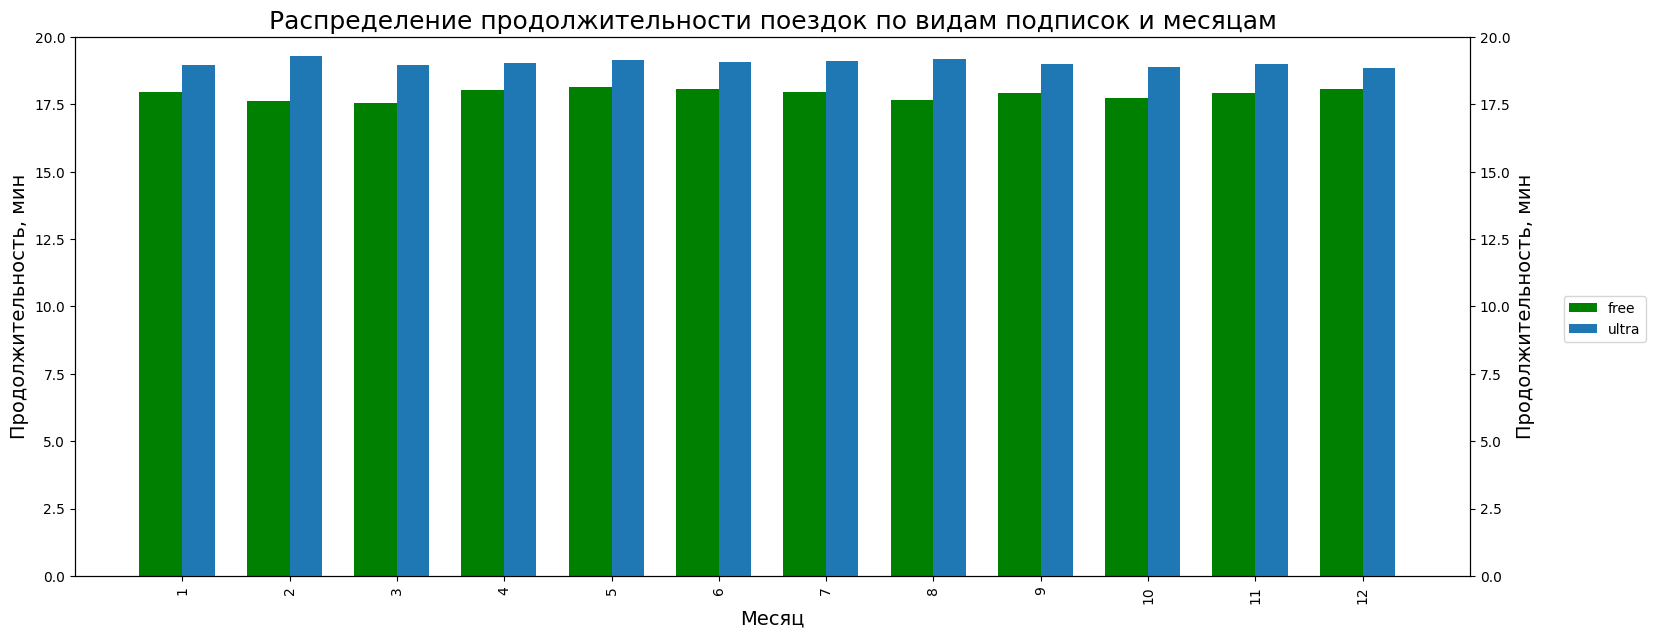

In [46]:
fig, ax = plt.subplots(figsize=(18,7))

ax1 = ax.twinx()
(
    full_data[full_data['subscription_type']=='free']
    .groupby(['month'])['duration'].mean()
    .plot(kind='bar',
          x ='month',
          y = 'duration',
          ax=ax,
          position=1,
          width = 0.4,
          color ='g'
         )
)

(
    full_data[full_data['subscription_type']=='ultra']
    .groupby(['month'])['duration'].mean()
    .plot(kind='bar',
          x ='month',
          y = 'duration',
          ax=ax1,
          position=0,
          width = 0.3,
         )
)


ax.set_ylim(0, 20)
ax1.set_ylim(0, 20)
ax.set_xlim(-1,12)


ax.set_ylabel('Продолжительность, мин', size=14)
ax1.set_ylabel('Продолжительность, мин', size=14)
ax.set_xlabel('Месяц', size=14)
fig.legend(['free','ultra'],loc='right')

plt.title('Распределение продолжительности поездок по видам подписок и месяцам', size = 18)
plt.show()

### Гипотеза №2 - Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. 

**H_0: Среднее расстояние (distance) пользователей на подписке ultra = 3130 метров**

**H_1: Среднее расстояние (distance) пользователей на подписке ultra > 3130 метров**

**alpha = 0.01**

In [47]:
ultra_dist = ultra_sub['distance']

interested_value = 3130.0

alpha = 0.01

results = st.ttest_1samp(
    ultra_dist, 
    interested_value,
    alternative='greater')
    
print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9195368847849785
Не удалось отвергнуть нулевую гипотезу


### Вывод

Проверили гипотезу, и соответсвенно мы можем утверждать, что пользователи с подпиской в среднем проезжают расстояние равное или не превышающее оптимальное - 3130 м.

### Гипотеза №3 - Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

**H_0: Выручка (revenue_per_month) пользователей на подписке ultra = выручка (revenue_per_month) пользователей на подписке free**

**H_1: Выручка (revenue_per_month) пользователей на подписке ultra > выручка (revenue_per_month) пользователей на подписке free**

**alpha = 0.05**

In [48]:
ultra_per_mnth = total_data.loc[total_data['subscription_type'] == 'ultra', 'revenue_per_month'] 

free_per_mnth = total_data.loc[total_data['subscription_type'] == 'free', 'revenue_per_month'] 


results = st.ttest_ind(ultra_per_mnth,
                       free_per_mnth,
                       alternative = 'greater')

alpha = 0.01

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.88503943847153e-31
Отвергаем нулевую гипотезу


### Вывод

Проверили гипотезу, соответственно, мы можем утверждать, что выручка с пользователей на подписке ultra превышает выручку с пользователей на подписке free

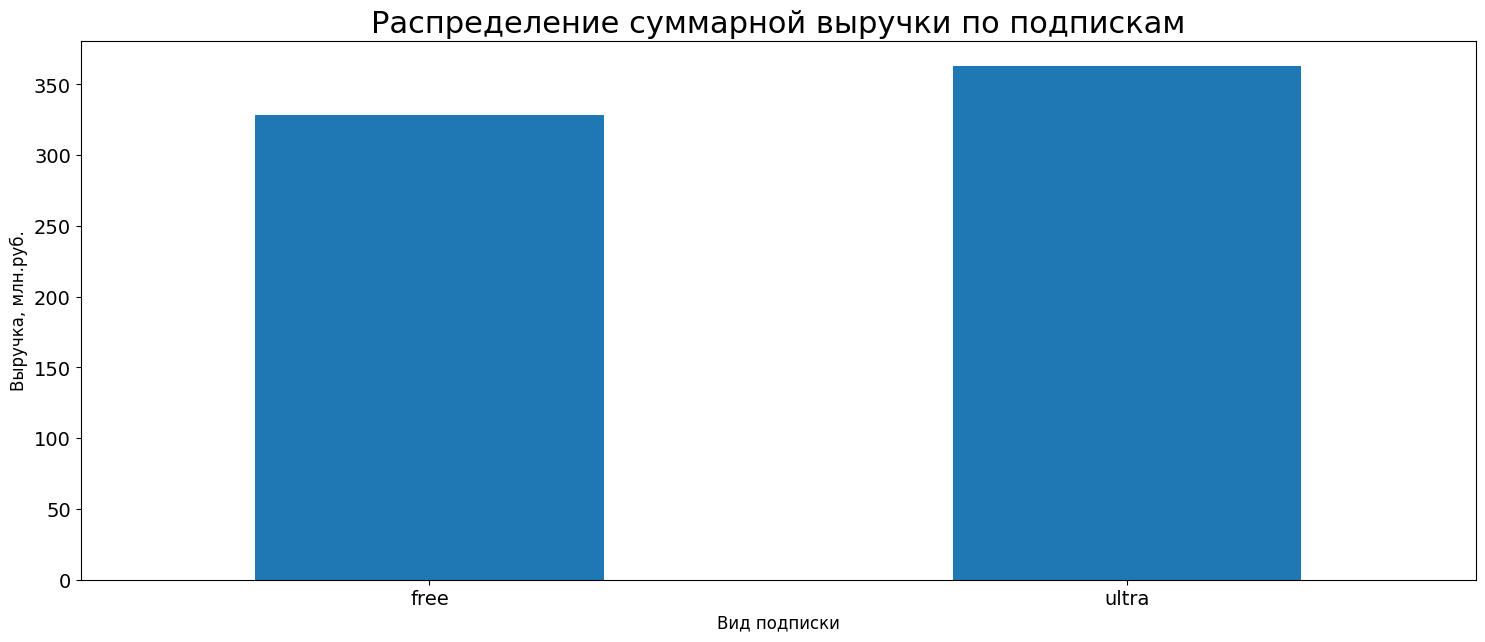

In [49]:
(
    total_data.groupby('subscription_type')['revenue_per_month'].mean()
    .plot(kind='bar',
          figsize=(18,7),
          rot=0,
          fontsize = 14,
         )
)
plt.title('Распределение суммарной выручки по подпискам', size = 22)
plt.xlabel('Вид подписки', size=12)
plt.ylabel('Выручка, млн.руб.', size=12)

plt.show()

### Гипотеза №4 - Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ:

Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.

Гипотезы будут сформулированы так:

**H0 : μ1 = μ2**  
**H1 : μ1 < μ2**  
где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

Метод, который нужно использовать при сравнении: `scipy.stats.ttest_rel()` с параметром `alternative='less'`

## Общий вывод

Загрузили 3 датафрейма: с пользователями, информацией о поездках, информацией о подписках.

Дальше проверили данные на пропуски, их не оказалось ни в одной таблице. Поменяли тип данных у столбца date из датафрейма data_riders к типу даты. Также добавили столбец month с номером месяца. И удалили дубликаты строк из датафрейма с пользователями.

Провели исследовательский анализ данных:

- Вывели, что количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.
- Пользователей, использующих бесплатную подписку больше - 835 человек, что является ~54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является ~46%.
- Возраст пользователей укладывается в промежуток от 20 до 30 лет
- В основном пользователи проезжают от 2.5 км до 4 км.
- Чаще всего длительность поездки состовляет 13 - 22 минут

Объединили данные о пользователях, поездках и подписках в один датафрейм. На основе объединенного датафрейма создали еще 2 датафрейма:

- Для пользователей с ultra подпиской
- Для пользователей с free подпиской

Дальше визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.

- Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.
- Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.

Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц - вывели все данные в отдельный датафрейм total_data. Добавили в датафрейм total_data столбец с помесячной выручкой revenue_per_month.

Проверили гипотезы:

- Пользователи с подпиской в среднем тратят больше времени на поездки, чем пользователи на бесплатном тарифе
  - Отвергли нулевую гипотезу
- Пользователи с подпиской в среднем проезжают больше 3130 метров за одну поездку
  - Не удалось отвергнуть нулевую гипотезу
- Помесячная выручка от пользователей с подпиской в среднем выше, чем выручка от пользователей без подписки
  - Отвергли нулевую гипотезу
  
Исходя из полученных результатов, рекомендую продвигать подписку `ultra`.